# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_name = []
lat = []
long =[]
max_temp =[]
humidity =[]
clouds =[]
wind =[]
cntry = []
date =[] 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
print('Begin Data Retreival')
print('----------------------------')
for index , city in enumerate(cities, start=1):
    try:
        query_url = url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city
        response = requests.get(query_url)
        print(f"Processing Weather Data  of {index} set | {city}")
        city_name.append(response.json()['name'])
        lat.append(response.json()['coord']['lat'])
        long.append(response.json()['coord']['lon'])
        max_temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        clouds.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])
        cntry.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        
    except:
        print('City Not Found. Skipping to next city')
print('----------------------------')
print('End of Data Retrieval')
   
     
    

Begin Data Retreival
----------------------------
Processing Weather Data  of 1 set | hilo
Processing Weather Data  of 2 set | kapaa
Processing Weather Data  of 3 set | lieksa
Processing Weather Data  of 4 set | albany
Processing Weather Data  of 5 set | saint-francois
Processing Weather Data  of 6 set | provideniya
Processing Weather Data  of 7 set | cape town
Processing Weather Data  of 8 set | vaini
Processing Weather Data  of 9 set | mataura
Processing Weather Data  of 10 set | castro
Processing Weather Data  of 11 set | wakkanai
Processing Weather Data  of 12 set | geraldton
Processing Weather Data  of 13 set | lerwick
Processing Weather Data  of 14 set | bluff
Processing Weather Data  of 15 set | longyearbyen
Processing Weather Data  of 16 set | tsihombe
City Not Found. Skipping to next city
Processing Weather Data  of 17 set | paamiut
Processing Weather Data  of 18 set | padang
Processing Weather Data  of 19 set | bjorkelangen
Processing Weather Data  of 20 set | upernavik
Proce

Processing Weather Data  of 165 set | worthington
Processing Weather Data  of 166 set | rocha
Processing Weather Data  of 167 set | panaba
Processing Weather Data  of 168 set | sale
Processing Weather Data  of 169 set | sorong
Processing Weather Data  of 170 set | tungor
Processing Weather Data  of 171 set | tasiilaq
Processing Weather Data  of 172 set | panacan
Processing Weather Data  of 173 set | verkh-usugli
Processing Weather Data  of 174 set | arona
Processing Weather Data  of 175 set | saint-philippe
Processing Weather Data  of 176 set | cherskiy
Processing Weather Data  of 177 set | mar del plata
Processing Weather Data  of 178 set | kadhan
Processing Weather Data  of 179 set | sorland
Processing Weather Data  of 180 set | luderitz
Processing Weather Data  of 181 set | carnarvon
Processing Weather Data  of 182 set | sao filipe
Processing Weather Data  of 183 set | yanchukan
City Not Found. Skipping to next city
Processing Weather Data  of 184 set | gornopravdinsk
Processing Wea

Processing Weather Data  of 320 set | shache
Processing Weather Data  of 321 set | nanortalik
Processing Weather Data  of 322 set | waingapu
Processing Weather Data  of 323 set | vila
Processing Weather Data  of 324 set | chifeng
Processing Weather Data  of 325 set | port-gentil
Processing Weather Data  of 326 set | saint anthony
Processing Weather Data  of 327 set | asosa
Processing Weather Data  of 328 set | conceicao do araguaia
Processing Weather Data  of 329 set | urucara
Processing Weather Data  of 330 set | cerinza
Processing Weather Data  of 331 set | milkovo
Processing Weather Data  of 332 set | culfa
Processing Weather Data  of 333 set | bereda
Processing Weather Data  of 334 set | taoudenni
Processing Weather Data  of 335 set | hihifo
City Not Found. Skipping to next city
Processing Weather Data  of 336 set | cidreira
Processing Weather Data  of 337 set | zlynka
Processing Weather Data  of 338 set | ust-nera
Processing Weather Data  of 339 set | moose factory
Processing Weat

Processing Weather Data  of 485 set | pedra branca
Processing Weather Data  of 486 set | tasbuget
City Not Found. Skipping to next city
Processing Weather Data  of 487 set | chaman
Processing Weather Data  of 488 set | ilhabela
Processing Weather Data  of 489 set | tevriz
Processing Weather Data  of 490 set | tete
Processing Weather Data  of 491 set | newport
Processing Weather Data  of 492 set | broome
Processing Weather Data  of 493 set | rumilly
Processing Weather Data  of 494 set | acuna
City Not Found. Skipping to next city
Processing Weather Data  of 495 set | boa vista
Processing Weather Data  of 496 set | fort nelson
Processing Weather Data  of 497 set | topeka
Processing Weather Data  of 498 set | savannah bight
Processing Weather Data  of 499 set | dharchula
Processing Weather Data  of 500 set | nabire
Processing Weather Data  of 501 set | mogadishu
Processing Weather Data  of 502 set | concarneau
Processing Weather Data  of 503 set | pekan
Processing Weather Data  of 504 set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df = pd.DataFrame({'City Name': city_name,
     'Lat':lat,
     'Lon': long,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudines':clouds,
     'Wind Speed':wind,
     'Country':cntry,
     'Date':date})
df.set_index('City Name', inplace = True)
display(df)

,Lat,Lon,Max Temperature,Humidity,Cloudines,Wind Speed,Country,Date
City Name,,,,,,,,
Hilo,19.7297,-155.0900,17.22,72,1,2.57,US,1618327756
Kapaa,22.0752,-159.3190,18.00,82,20,2.57,US,1618327963
Lieksa,63.3167,30.0167,3.01,90,100,1.58,FI,1618327964
Albany,42.6001,-73.9662,15.00,51,39,1.44,US,1618327801
Saint-François,46.4154,3.9054,10.56,46,75,5.66,FR,1618327964
...,...,...,...,...,...,...,...,...
Dūkštas,55.5333,26.3333,6.08,81,99,4.90,LT,1618328177
Januária,-15.4833,-44.3667,35.29,29,99,0.36,BR,1618328178
Umm Kaddadah,13.6017,26.6876,29.69,3,7,5.42,SD,1618328178


In [10]:
df.to_csv(path_or_buf = output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humid_af = df[df['Humidity']> 100 ]
humid_af

,Lat,Lon,Max Temperature,Humidity,Cloudines,Wind Speed,Country,Date
City Name,,,,,,,,


In [22]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)


,Lat,Lon,Max Temperature,Humidity,Cloudines,Wind Speed,Country,Date
City Name,,,,,,,,


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df[df['Humidity']<= 100]

In [24]:
display(clean_city_data)


,Lat,Lon,Max Temperature,Humidity,Cloudines,Wind Speed,Country,Date
City Name,,,,,,,,
Hilo,19.7297,-155.0900,17.22,72,1,2.57,US,1618327756
Kapaa,22.0752,-159.3190,18.00,82,20,2.57,US,1618327963
Lieksa,63.3167,30.0167,3.01,90,100,1.58,FI,1618327964
Albany,42.6001,-73.9662,15.00,51,39,1.44,US,1618327801
Saint-François,46.4154,3.9054,10.56,46,75,5.66,FR,1618327964
...,...,...,...,...,...,...,...,...
Dūkštas,55.5333,26.3333,6.08,81,99,4.90,LT,1618328177
Januária,-15.4833,-44.3667,35.29,29,99,0.36,BR,1618328178
Umm Kaddadah,13.6017,26.6876,29.69,3,7,5.42,SD,1618328178


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

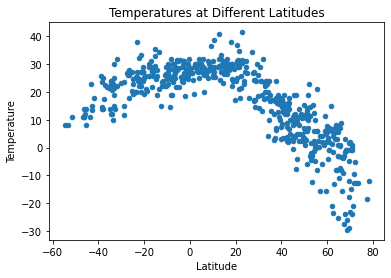

In [29]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperatures at Different Latitudes');

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression